<a href="https://colab.research.google.com/github/AJAYrocks13/-IITISoc-22-AFB5-Paper-trading-stock-simulator/blob/main/High_and_low_levels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install mpl_finance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import pandas as pd
import numpy as np
import yfinance
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 7]

plt.rc('font', size=14) 

In [7]:
name = 'SPY'
ticker = yfinance.Ticker(name)
df = ticker.history(interval="1d",start="2020-03-15",end="2020-07-15")

In [8]:
df['Date'] = pd.to_datetime(df.index)
df['Date'] = df['Date'].apply(mpl_dates.date2num)

df = df.loc[:,['Date', 'Open', 'High', 'Low', 'Close']]

In [9]:
df

,Date,Open,High,Low,Close
Date,,,,,
2020-03-16 00:00:00-04:00,737500.166667,229.914178,244.899878,226.272622,228.646317
2020-03-17 00:00:00-04:00,737501.166667,233.593879,244.204002,225.996181,240.991409
2020-03-18 00:00:00-04:00,737502.166667,225.214459,236.768313,217.368897,228.789291
2020-03-19 00:00:00-04:00,737503.166667,228.074313,235.824555,221.372695,229.275452
2020-03-20 00:00:00-04:00,737504.166667,232.560634,234.420892,219.107348,219.395020
...,...,...,...,...,...
2020-07-08 00:00:00-04:00,737614.166667,303.005299,304.632964,301.165777,304.517395
2020-07-09 00:00:00-04:00,737615.166667,305.153035,305.403454,299.220249,302.783783
2020-07-10 00:00:00-04:00,737616.166667,302.716354,306.154677,301.223539,305.875366


In [10]:
def isSupport(df,i):
  support = df['Low'][i] < df['Low'][i-1]  and df['Low'][i] < df['Low'][i+1] \
  and df['Low'][i+1] < df['Low'][i+2] and df['Low'][i-1] < df['Low'][i-2]

  return support

def isResistance(df,i):
  resistance = df['High'][i] > df['High'][i-1]  and df['High'][i] > df['High'][i+1] \
  and df['High'][i+1] > df['High'][i+2] and df['High'][i-1] > df['High'][i-2] 

  return resistance

In [11]:
levels = []
for i in range(2,df.shape[0]-2):
  if isSupport(df,i):
    levels.append((i,df['Low'][i]))
  elif isResistance(df,i):
    levels.append((i,df['High'][i]))

In [12]:
def plot_all():
  fig, ax = plt.subplots()

  candlestick_ohlc(ax,df.values,width=0.6, \
                   colorup='green', colordown='red', alpha=0.8)

  date_format = mpl_dates.DateFormatter('%d %b %Y')
  ax.xaxis.set_major_formatter(date_format)
  fig.autofmt_xdate()

  fig.tight_layout()

  for level in levels:
    plt.hlines(level[1],xmin=df['Date'][level[0]],\
               xmax=max(df['Date']),colors='blue')
  fig.show()

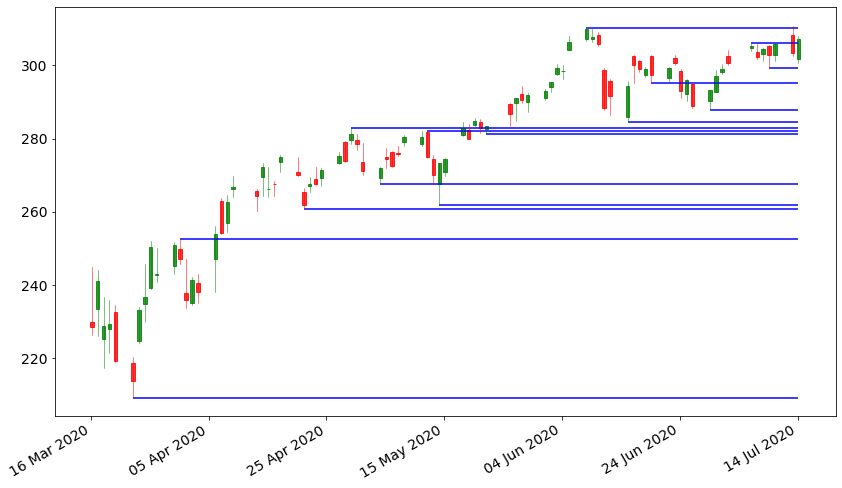

In [13]:
plot_all()

In [14]:
s =  np.mean(df['High'] - df['Low'])

In [15]:
def isFarFromLevel(l):
  return np.sum([abs(l-x) < s  for x in levels]) == 0

In [16]:
levels = []
for i in range(2,df.shape[0]-2):
  if isSupport(df,i):
    l = df['Low'][i]

    if isFarFromLevel(l):
      levels.append((i,l))

  elif isResistance(df,i):
    l = df['High'][i]

    if isFarFromLevel(l):
      levels.append((i,l))

In [17]:
levels

[(5, 209.2882900483482),
 (11, 252.50563153411173),
 (25, 260.838467733065),
 (31, 282.75874544816804),
 (58, 310.1160019386741),
 (67, 295.22333782630875)]

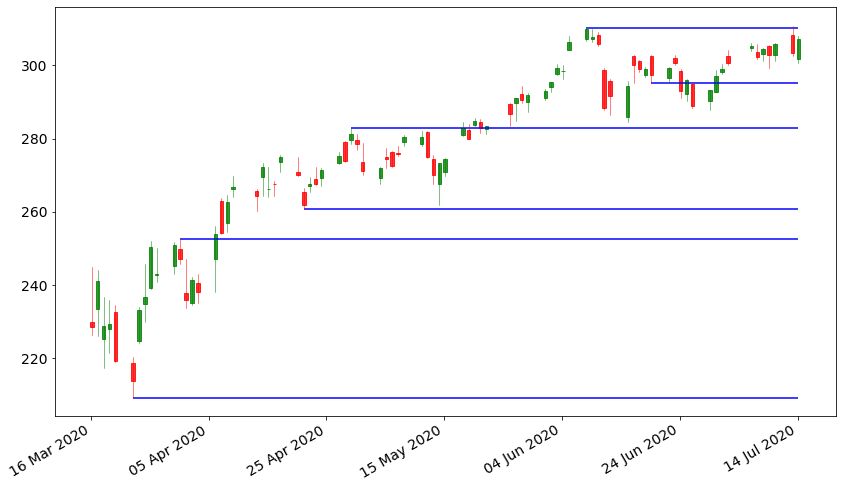

In [18]:
plot_all()